<a href="https://colab.research.google.com/github/andreaseliass/AI-abalones/blob/main/Simula%C3%A7%C3%B5es_cap_03_PDI_Andrea_Sampaio_Elias_433367.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulações - Capítulo 03 - PDI - Andrea Sampaio Elias - 433367

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from skimage.io import imread

In [80]:
imagens = ['img3.05.jpg', 'img3.08.jpg', 'img3.10.tif', 'img3.12.tif', 'img3.14.tif', 'img3.20.1.tif', 'img3.20.2.tif', 'img3.20.3.tif', 'img3.20.4.tif', 'img3.23.png', 'img3.25.jpg', 'img3.26.tif', 'img3.27.tif',  'img3.33.tif', 'img3.34.tif', 'img3.35.tif', 'img3.38.tif', 'img3.40.tif', 'img3.42.tif', 'img3.43.tif', 'img3.54.tif']


Imagem 3.05


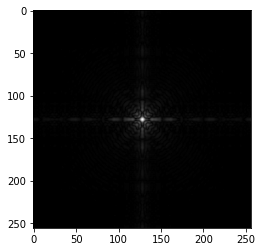

In [132]:
img = cv.imread(imagens[0])
imshow(img, cmap='gray', vmin=0, vmax=255);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


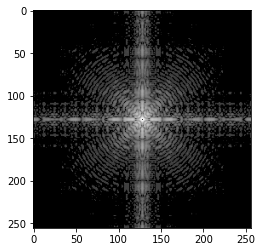

In [138]:
# Apply log transform
img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)
# Display the image
imshow(img_log)

Imagem 3.08

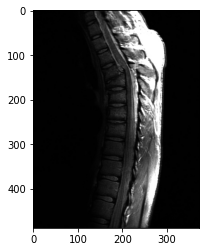

In [124]:
img = cv.imread(imagens[1])
imshow(img, cmap='gray', vmin=0, vmax=255);

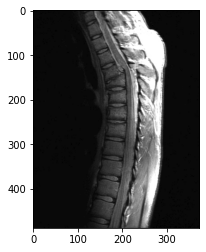

In [127]:
# Similarly, Apply Gamma=0.6
img06 = np.array(255*(img/255)**0.6,dtype='uint8')
# Display the image
imshow(img06)



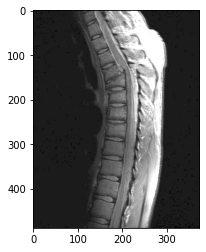

In [128]:
# Similarly, Apply Gamma=0.4
img04 = np.array(255*(img/255)**0.4,dtype='uint8')
# Display the image
imshow(img04)

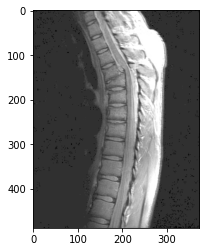

In [131]:
# Similarly, Apply Gamma=0.3
img03 = np.array(255*(img/255)**0.3,dtype='uint8')
# Display the images in subplots
imshow(img03)

Imagem 3.10

In [3]:
def alargamento_de_contraste(image):
  min = np.amin(image)
  max = np.amax(image)
  return ((image - min)/(max - min))*255

In [4]:
def limiarizacao(image):
  min = np.mean(image)
  return (image - min)*255

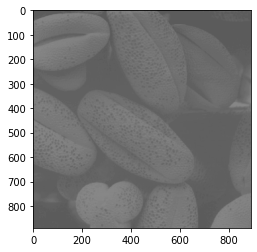

In [9]:
image = imread(imagens[2])
imshow(image, cmap='gray', vmin=0, vmax=255);

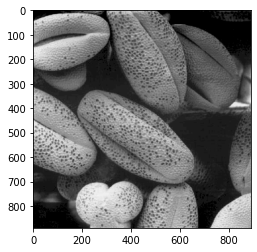

In [10]:
image_applied = alargamento_de_contraste(image)
imshow(image_applied, cmap='gray', vmin=0, vmax=255);

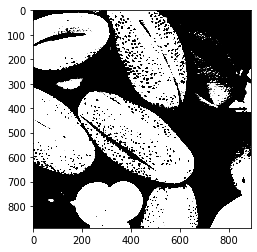

In [11]:
image_applied = limiarizacao(image)
imshow(image_applied, cmap='gray', vmin=0, vmax=255);

Imagem 3.12

In [12]:
def fatiando1(image, A, B):
    image_applied = image.copy()
    image_applied[image < A] = 0
    image_applied[np.logical_and(image > A, image < B)] = 255
    return image_applied

In [13]:
def fatiando2(image, A, B):
    image_applied = image.copy()
    image_applied[np.logical_or(image < A, image > B)] = 30
    image_applied[image < 80] = 2*image_applied[image < 80]
    return image_applied

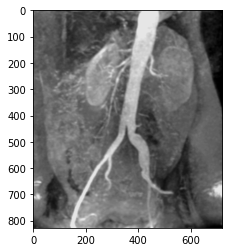

In [14]:
image = imread(imagens[3])
imshow(image, cmap='gray', vmin=0, vmax=255);

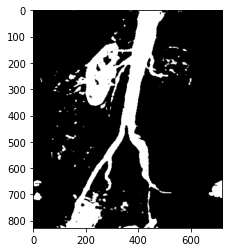

In [15]:
image_applied = fatiando1(image, 140, 255)
imshow(image_applied, cmap='gray', vmin=0, vmax=255);

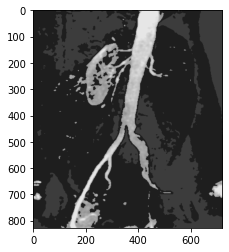

In [16]:
image_applied = fatiando2(image, 146, 255)
imshow(image_applied, cmap='gray', vmin=0, vmax=255);

Imagem 3.14

In [17]:
def fatiando(image, plane):
    a = image
    p = np.array(
                 [[int(np.binary_repr(a[i][j], 8)[8 - plane]) * 255
                   for j in range(0, a.shape[1])]
                  for i in range(0, a.shape[0])])
    return p

In [18]:
a = image.copy()

int(np.binary_repr(a[1][1], 8)[8 - 3])*255

0

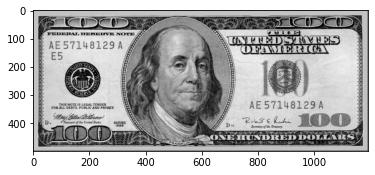

In [20]:
image = imread(imagens[4])
imshow(image, cmap='gray', vmin=0, vmax=255);

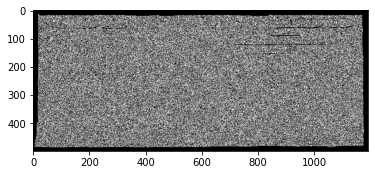

In [21]:
image_applied = fatiando(image, 1)
imshow(image_applied, cmap='gray', vmin=0, vmax=255);

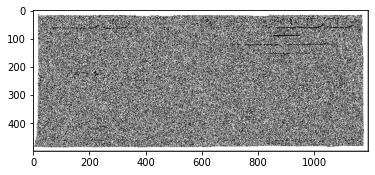

In [23]:
image_applied = fatiando(image, 2)
imshow(image_applied, cmap='gray', vmin=0, vmax=255);

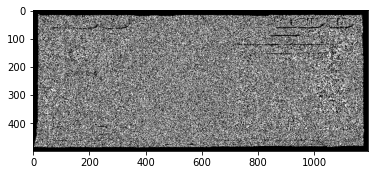

In [24]:
image_applied = fatiando(image, 3)
imshow(image_applied, cmap='gray', vmin=0, vmax=255);

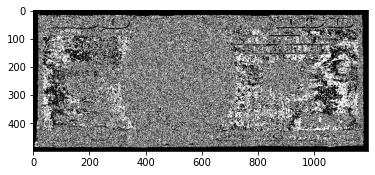

In [25]:
image_applied = fatiando(image, 4)
imshow(image_applied, cmap='gray', vmin=0, vmax=255);

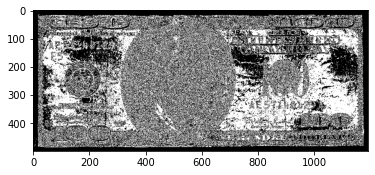

In [26]:
image_applied = fatiando(image, 5)
imshow(image_applied, cmap='gray', vmin=0, vmax=255);

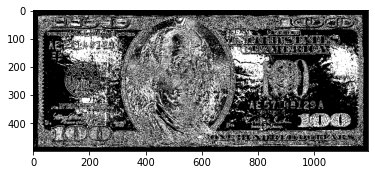

In [27]:
image_applied = fatiando(image, 6)
imshow(image_applied, cmap='gray', vmin=0, vmax=255);

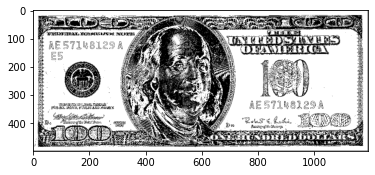

In [28]:
image_applied = fatiando(image, 7)
imshow(image_applied, cmap='gray', vmin=0, vmax=255);

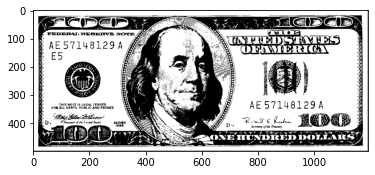

In [30]:
image_applied = fatiando(image, 8)
imshow(image_applied, cmap='gray', vmin=0, vmax=255);

Imagem 3.20

In [34]:
def contagem_intensidade(image, num_pixels):
  imagem1array = np.reshape(image, num_pixels)
  intensidadearray = np.zeros(256)
  for pixel in imagem1array:
      intensidadearray[pixel] += 1

  return intensidadearray

In [35]:
def histogramaequalizacao(image, intensity, num_pixels):
  imagem1array = np.reshape(image, num_pixels)

  sum_acum = np.cumsum(intensity)

  n = (sum_acum - sum_acum.min()) * 255
  N = sum_acum.max() - sum_acum.min()
  c = n/N
  c = c.astype('uint8')
  
  return c[imagem1array] 

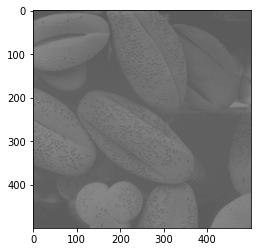

In [36]:
image = imread(imagens[5])
imshow(image, cmap='gray', vmin=0, vmax=255);

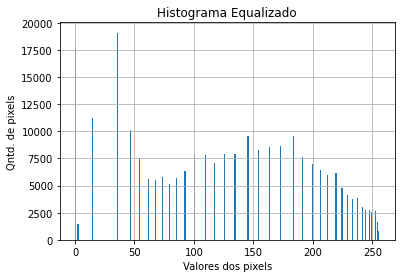

In [37]:
equa = cv.equalizeHist(src=image)
cv.calcHist(equa, [0], None, [256], [0, 256])
plt.hist(equa.ravel(), 256, [0, 256])
plt.title('Histograma Equalizado')
plt.xlabel('Valores dos pixels')
plt.ylabel('Qntd. de pixels')
plt.grid(True)

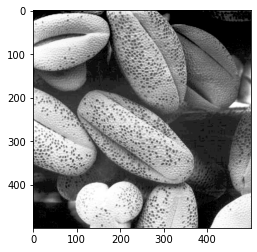

In [38]:
imshow(equa, cmap='gray', vmin=0, vmax=255);


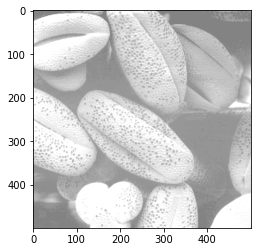

In [39]:
image = imread(imagens[6])
imshow(image, cmap='gray', vmin=0, vmax=255);

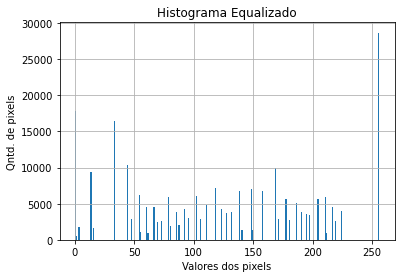

In [40]:
equa = cv.equalizeHist(src=image)
cv.calcHist(equa, [0], None, [256], [0, 256])
plt.hist(equa.ravel(), 256, [0, 256])
plt.title('Histograma Equalizado')
plt.xlabel('Valores dos pixels')
plt.ylabel('Qntd. de pixels')
plt.grid(True)

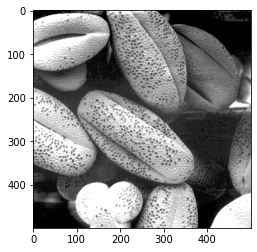

In [41]:
imshow(equa, cmap='gray', vmin=0, vmax=255);


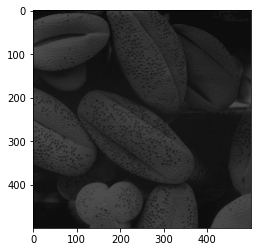

In [43]:
image = imread(imagens[7])
imshow(image, cmap='gray', vmin=0, vmax=255);

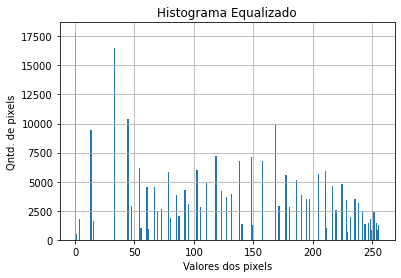

In [44]:
equa = cv.equalizeHist(src=image)
cv.calcHist(equa, [0], None, [256], [0, 256])
plt.hist(equa.ravel(), 256, [0, 256])
plt.title('Histograma Equalizado')
plt.xlabel('Valores dos pixels')
plt.ylabel('Qntd. de pixels')
plt.grid(True)

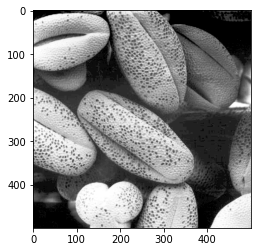

In [45]:
imshow(equa, cmap='gray', vmin=0, vmax=255);


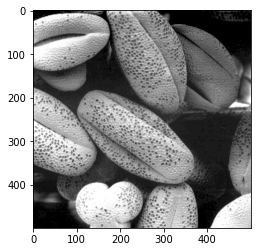

In [46]:
image = imread(imagens[8])
imshow(image, cmap='gray', vmin=0, vmax=255);

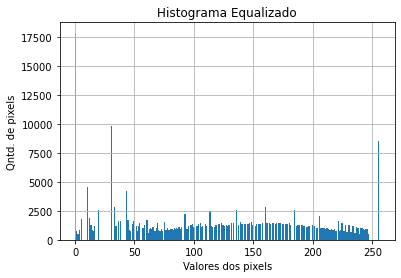

In [47]:
equa = cv.equalizeHist(src=image)
cv.calcHist(equa, [0], None, [256], [0, 256])
plt.hist(equa.ravel(), 256, [0, 256])
plt.title('Histograma Equalizado')
plt.xlabel('Valores dos pixels')
plt.ylabel('Qntd. de pixels')
plt.grid(True)

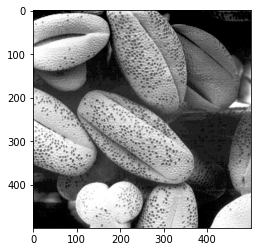

In [48]:
imshow(equa, cmap='gray', vmin=0, vmax=255);


Imagem 3.25

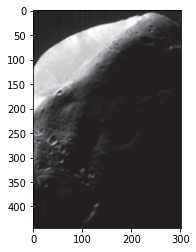

In [58]:
# Imagem original 3.23

fig323 = imread(imagens[9])


plt.imshow(fig323, cmap='gray', vmin = 0, vmax = 255)

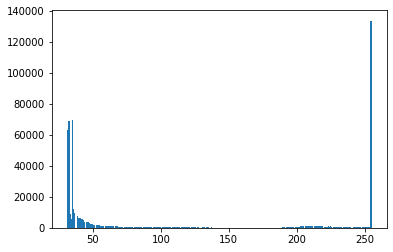

In [60]:
# Histograma da imagem original
fig323_hist_plot = plt.hist(fig323.flatten(), bins=256)
fig323_hist = np.histogram(fig323.flatten(),256,[0,256])[0]
plt.show(fig323_hist_plot)

In [61]:
# CS equivale a soma acumulada do histograma até determinado ponto
fig323_cs = fig323_hist.cumsum()
# Numerador e denominador da fórmula da normalização do histograma discreto
fig323_nj = fig323_cs * 255
fig323_N = fig323_cs.max()

# Normalizando a soma acumulada
fig323_cs = fig323_nj / fig323_N

# Transformando os valores para inteiros porque a imagem não aceita valores float
fig323_cs = fig323_cs.astype('uint8')

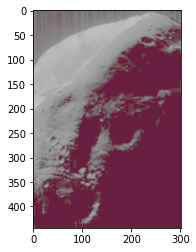

In [63]:
# Nova imagem normalizada 3.24
fig323_normalized = fig323_cs[fig323.flatten()]
fig323_normalized = np.reshape(fig323_normalized, fig323.shape)
plt.imshow(fig323_normalized, cmap='gray', vmin = 0, vmax = 255)

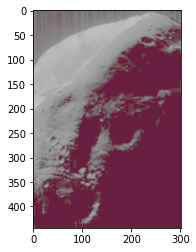

In [65]:
# Nova imagem normalizada 3.24
fig323_normalized = fig323_cs[fig323.flatten()]
fig323_normalized = np.reshape(fig323_normalized, fig323.shape)
plt.imshow(fig323_normalized, cmap='gray', vmin = 0, vmax = 255)

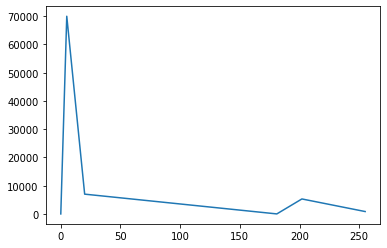

In [50]:
# Histograma desejado
def histograma_desejado(x):
  if x>=0 and x<=5:
    return x*7/5
  elif x>5 and x<=20:
    return 7-6.3*(x-5)/15
  elif x>20 and x<=181:
    return 0.7-0.7*(x-20)/161
  elif x>181 and x<=202:
    return (x-181)*0.53/21
  elif x>202 and x<=255:
    return 0.53 -(x-202)*0.53/63
  return 0

histograma_especificado = np.array([histograma_desejado(i) * 10**4 for i in range(0, 256)])
plt.plot(histograma_especificado)

In [66]:
# 1. Calcular a transformação de equalização do histograma da imagem original
# CS equivale a soma acumulada do histograma até determinado ponto
fig323_cs = fig323_hist.cumsum()
# Numerador e denominador da fórmula da normalização do histograma discreto
fig323_nj = fig323_cs * 255
fig323_N = fig323_cs.max()

# Normalizando a soma acumulada
fig323_cs = fig323_nj / fig323_N

# Transformando os valores para inteiros porque a imagem não aceita valores float
fig323_cs = fig323_cs.astype('uint8')

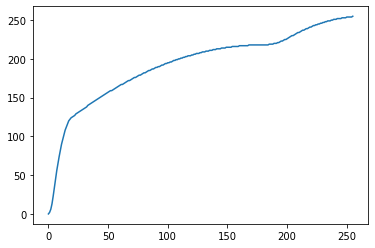

In [68]:
# 2. Calcule todos os valores da função de transformação G para o histograma específicado

# CS equivale a soma acumulada do histograma até determinado ponto
histograma_especificado_cs = histograma_especificado.cumsum()
#[0,2,3,4].cumsum() = [0, 2, 5, 9]
# Numerador e denominador da fórmula da normalização do histograma discreto
histograma_especificado_nj = histograma_especificado_cs * 255
histograma_especificado_N = histograma_especificado_cs.max()

# Normalizando a soma acumulada
histograma_especificado_cs = histograma_especificado_nj / histograma_especificado_N

# Transformando os valores para inteiros porque a imagem não aceita valores float
histograma_especificado_cs = histograma_especificado_cs.astype('uint8')
plt.plot(histograma_especificado_cs)

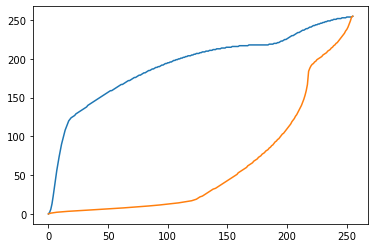

In [70]:
# 3. Inverta os eixos da função de transformação G (função em laranja)
plt.plot(histograma_especificado_cs) # linha azul
# Faz a interpolação, para gerar valores de 0 a 255, pegando como y no lugar do x e vice-versa
#np.interp(valores_novos, x, y)
transformacao_g_inversa = np.interp(range(0,256), histograma_especificado_cs, range(0, 256)) #Faz uma interpolação para encontrar os valores desconhecidos
plt.plot(transformacao_g_inversa) # linha laranja

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


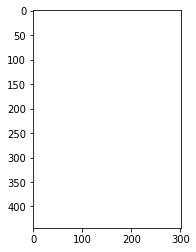

In [72]:
# 4. Aplique a função de transformação G invertida na imagem
fig325_specified = transformacao_g_inversa[fig323_normalized.flatten()]
fig325_specified = np.reshape(fig325_specified, fig323.shape)
plt.imshow(fig325_specified, cmap='gray', vmin = 0, vmax = 255)

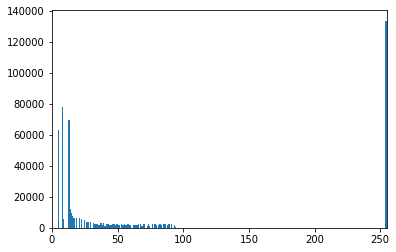

In [74]:
# Histograma da imagem com o histograma específicado
fig325_specified_hist_plot = plt.hist(fig325_specified.flatten(), bins=256)
plt.xlim(0, 255)
plt.show(fig325_specified_hist_plot) 

Imagem 3.26

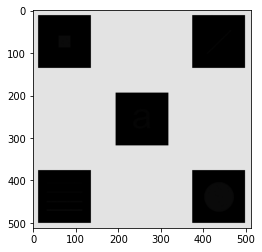

In [75]:
image = imread(imagens[11])
imshow(image, cmap='gray', vmin=0, vmax=255);

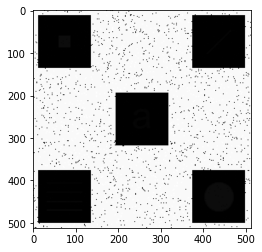

In [76]:
#Equalização Global
equa = cv.equalizeHist(src=image)
imshow(equa, cmap='gray', vmin=0, vmax=255);

Imagem 3.27

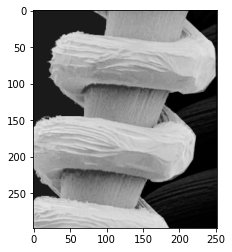

In [77]:
image = imread(imagens[12])
imshow(image, cmap='gray', vmin=0, vmax=255);

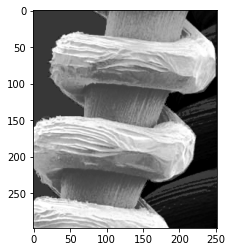

In [78]:
#Equalização Global
equa = cv.equalizeHist(src=image)
imshow(equa, cmap='gray', vmin=0, vmax=255);

Imagem 3.33

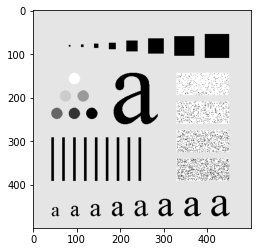

In [81]:
image = imread(imagens[13])
imshow(image, cmap='gray', vmin=0, vmax=255);

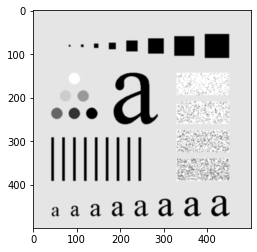

In [82]:
blur = cv.blur(image,(3,3))
imshow(blur, cmap='gray', vmin=0, vmax=255);

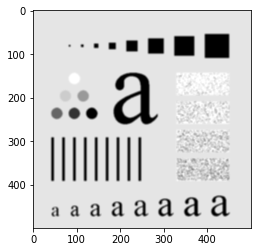

In [83]:
blur = cv.blur(image,(5,5))
imshow(blur, cmap='gray', vmin=0, vmax=255);

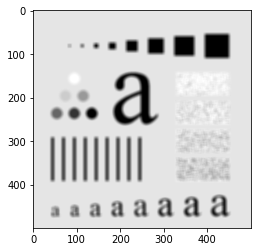

In [84]:
blur = cv.blur(image,(9,9))
imshow(blur, cmap='gray', vmin=0, vmax=255);

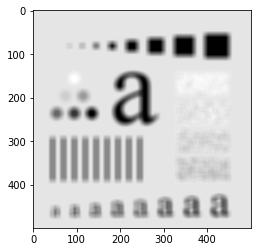

In [85]:
blur = cv.blur(image,(15,15))
imshow(blur, cmap='gray', vmin=0, vmax=255);

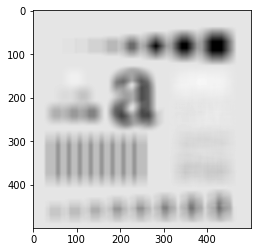

In [86]:
blur = cv.blur(image,(35,35))
imshow(blur, cmap='gray', vmin=0, vmax=255);

Imagem 3.34

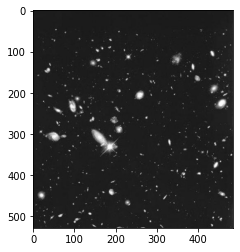

In [87]:
from PIL import ImageFilter
from PIL import Image, ImageEnhance
image = imread(imagens[14])
imshow(image, cmap='gray', vmin=0, vmax=255);
image = Image.fromarray(image)

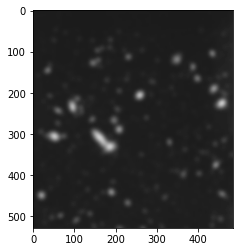

In [88]:
img = image.filter(ImageFilter.GaussianBlur(radius=5))
imshow(img, cmap='gray', vmin=0, vmax=255);

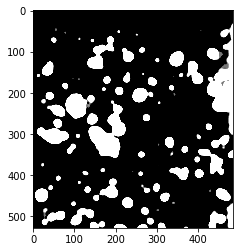

In [89]:
I = np.asarray(img)
image_applied = limiarizacao(I)
imshow(image_applied, cmap='gray', vmin=0, vmax=255);

Imagem 3.35

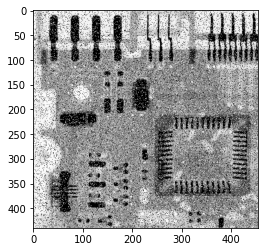

In [90]:
from PIL import ImageFilter
from PIL import Image, ImageEnhance
image = imread( imagens[15])
imshow(image, cmap='gray', vmin=0, vmax=255);
image2 = Image.fromarray(image)

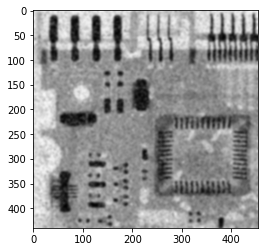

In [91]:
img = image2.filter(ImageFilter.GaussianBlur(radius=2))
imshow(img, cmap='gray', vmin=0, vmax=255);

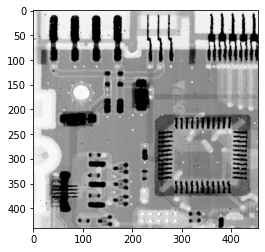

In [92]:
median = cv.medianBlur(image, 3)
imshow(median, cmap='gray', vmin=0, vmax=255);

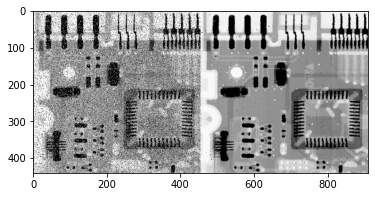

In [93]:
compare = np.concatenate((image, median), axis=1)
imshow(compare, cmap='gray', vmin=0, vmax=255);

Imagem 3.38

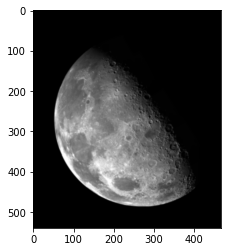

In [94]:
image = imread(imagens[16], cv.COLOR_BGR2GRAY)
imshow(image, cmap='gray', vmin=0, vmax=255);


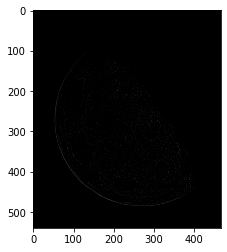

In [95]:
#A
ddepth = cv.CV_16S
kernel = np.array([[0 , -1 , 0] , [-1 , 4 , -1] ,[0 , -1 , 0]])
sharp_img = cv.filter2D(image , ddepth , kernel = kernel)
imshow(sharp_img, cmap='gray', vmin=0, vmax=255);

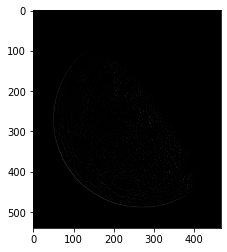

In [96]:
#B
kernel = np.array([[0 , 1 , 0] , [1 , -4 , 1] ,[0 , 1 , 0]])
sharp_img = cv.filter2D(image , ddepth , kernel = kernel)
imshow(sharp_img, cmap='gray', vmin=0, vmax=255);

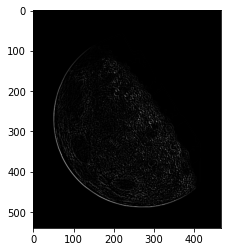

In [97]:
#C
kernel = np.array([[1 , 1 , 1] , [1 , -8 , 1] ,[1 , 1 , 1]])
sharp_img = cv.filter2D(image , -1 , kernel = kernel)
imshow(sharp_img, cmap='gray', vmin=0, vmax=255);

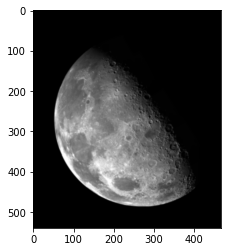

In [98]:
abs_dst = cv.convertScaleAbs(image)
imshow(abs_dst, cmap='gray', vmin=0, vmax=255);

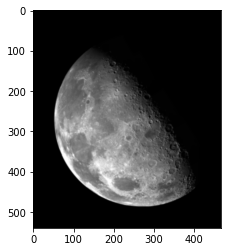

In [99]:
new_image = cv.Laplacian(image,cv.CV_64F)
imshow(abs_dst, cmap='gray', vmin=0, vmax=255);

Imagem 3.40

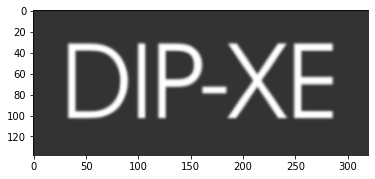

In [100]:
image = imread(imagens[17])
imshow(image, cmap='gray', vmin=0, vmax=255);

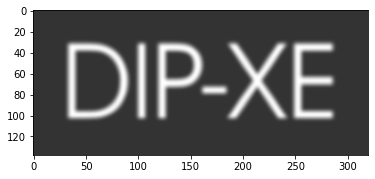

In [101]:
blur = cv.GaussianBlur(image,(5,5),sigmaX=3)
imshow(blur, cmap='gray', vmin=0, vmax=255);

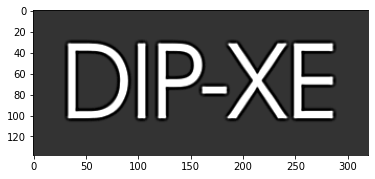

In [102]:
#mascara de nitdez
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
img2 = cv.filter2D(image, -1, kernel)
imshow(img2, cmap='gray', vmin=0, vmax=255);

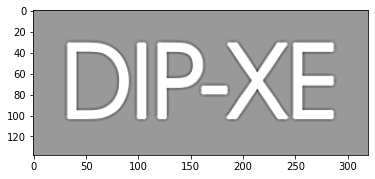

In [103]:
kernel = np.array([[-1 , -1 , -1] , [-1 , 11 , -1] ,[-1 , -1 , -1]])
sharp_img = cv.filter2D(image , -1 , kernel = kernel)
imshow(sharp_img, cmap='gray', vmin=0, vmax=255);

Imagem 3.42

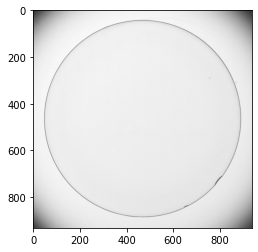

In [104]:
image = imread(imagens[18])
imshow(image, cmap='gray', vmin=0, vmax=255);

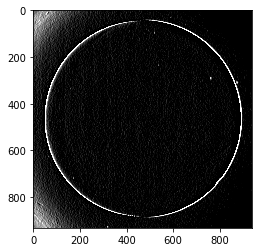

In [105]:
sobelx = cv.Sobel(image,cv.CV_64F,1,0,ksize=5)
imshow(sobelx, cmap='gray', vmin=0, vmax=255)

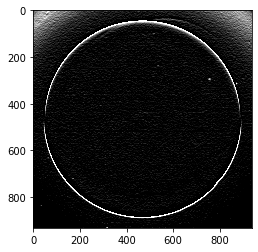

In [106]:
sobely = cv.Sobel(image,cv.CV_64F,0,1,ksize=5)
imshow(sobely, cmap='gray', vmin=0, vmax=255)

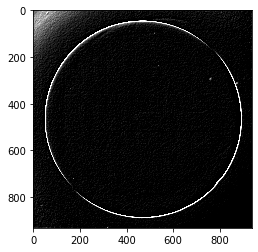

In [107]:
grad = cv.addWeighted(sobely, 0.5, sobelx, 0.5, 0)
imshow(grad, cmap='gray', vmin=0, vmax=255)

Imagem 3.43

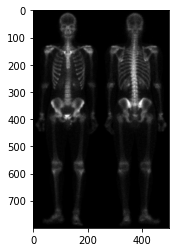

In [109]:
fig343 = imread(imagens[19])
imshow(fig343, cmap='gray', vmin=0, vmax=255);

In [110]:
# (b) Laplaciano da imagem original:
def fig343_laplacian(img, i, j):
  center_pixel = img[i, j]
  upper_pixel = 0
  right_pixel = 0
  left_pixel = 0
  bottom_pixel = 0
  if j+1 < img.shape[1]:
    upper_pixel = img[i, j+1]
  if j - 1 >= 0:
    bottom_pixel = img[i, j-1]
  if i+1 < img.shape[0]:
    right_pixel = img[i+1, j]
  if i-1 >= 0:
    left_pixel = img[i-1, j]
  return -4*center_pixel + upper_pixel + bottom_pixel + right_pixel + left_pixel

In [111]:
# Criação de uma matriz que será a nova imagem
laplacian_fig343 = np.zeros(fig343.shape)

# aplicando a mascara na imagem original
for i in range(fig343.shape[0]):
  for j in range(fig343.shape[1]):
    laplacian_fig343[i,j] = int(fig343_laplacian(fig343, i, j))

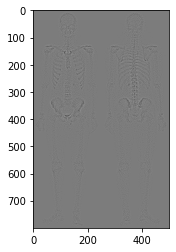

In [112]:
plt.imshow(laplacian_fig343, cmap='gray')